In [51]:
import pandas as pd

# Read the data
df = pd.read_csv('../data/c4_general_cafeteria_select.csv')

In [52]:
# df에 NAN이 있는지 확인
print('\n=====NAN 유무 확인=====')
print(df.isnull().sum())

# df에 NAN이 있는 행을 삭제
df = df.dropna()
df = df.reset_index(drop=True)
print('\n=====NAN 제거 확인=====')
print(df.isnull().sum())


=====NAN 유무 확인=====
번호            0
인허가일자         0
영업상태구분코드      0
소재지전체주소     207
사업장명          0
업태구분명         2
시설총규모         0
최종수정시점        0
dtype: int64

=====NAN 제거 확인=====
번호          0
인허가일자       0
영업상태구분코드    0
소재지전체주소     0
사업장명        0
업태구분명       0
시설총규모       0
최종수정시점      0
dtype: int64


In [53]:
# 데이터 전처리
# df에 '소재지전체주소'를 '시도'와 '구군'으로 분리
df['시/도'] = df['소재지전체주소'].str.split(' ').str[0]
df['구군'] = df['소재지전체주소'].str.split(' ').str[1]
df['동/면'] = df['소재지전체주소'].str.split(' ').str[2:-1]
print('\n=====시도와 구군 분리 확인=====')
df.head()


=====시도와 구군 분리 확인=====


,번호,인허가일자,영업상태구분코드,소재지전체주소,사업장명,업태구분명,시설총규모,최종수정시점,시/도,구군,동/면
0,1,2023-08-02,1,강원특별자치도 삼척시 남양동 55-4 중앙시장,왕성식당,한식,25.12,2023-08-02 11:25:07,강원특별자치도,삼척시,"[남양동, 55-4]"
1,2,2023-08-17,1,강원특별자치도 삼척시 갈천동 14-5,서프키키,경양식,120.00,2023-08-17 15:24:39,강원특별자치도,삼척시,[갈천동]
2,3,2023-08-25,1,강원특별자치도 삼척시 정하동 108-20 정라식육점,복순네국수집,한식,23.52,2023-08-25 14:31:22,강원특별자치도,삼척시,"[정하동, 108-20]"
3,4,2023-07-14,1,강원특별자치도 삼척시 근덕면 용화리 14-5 해양레일바이크,해변꼬치,식육(숯불구이),25.00,2023-07-14 09:47:58,강원특별자치도,삼척시,"[근덕면, 용화리, 14-5]"
4,5,2023-07-11,1,강원특별자치도 삼척시 근덕면 교가리 662-5,해조림찜,한식,28.49,2023-07-11 11:07:33,강원특별자치도,삼척시,"[근덕면, 교가리]"


/var/folders/vm/5qmxs2qx4jqfzfp5dmt_3x900000gn/T/ipykernel_27010/2891999590.py:16: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')
/var/folders/vm/5qmxs2qx4jqfzfp5dmt_3x900000gn/T/ipykernel_27010/2891999590.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='시/도', palette='Set1')


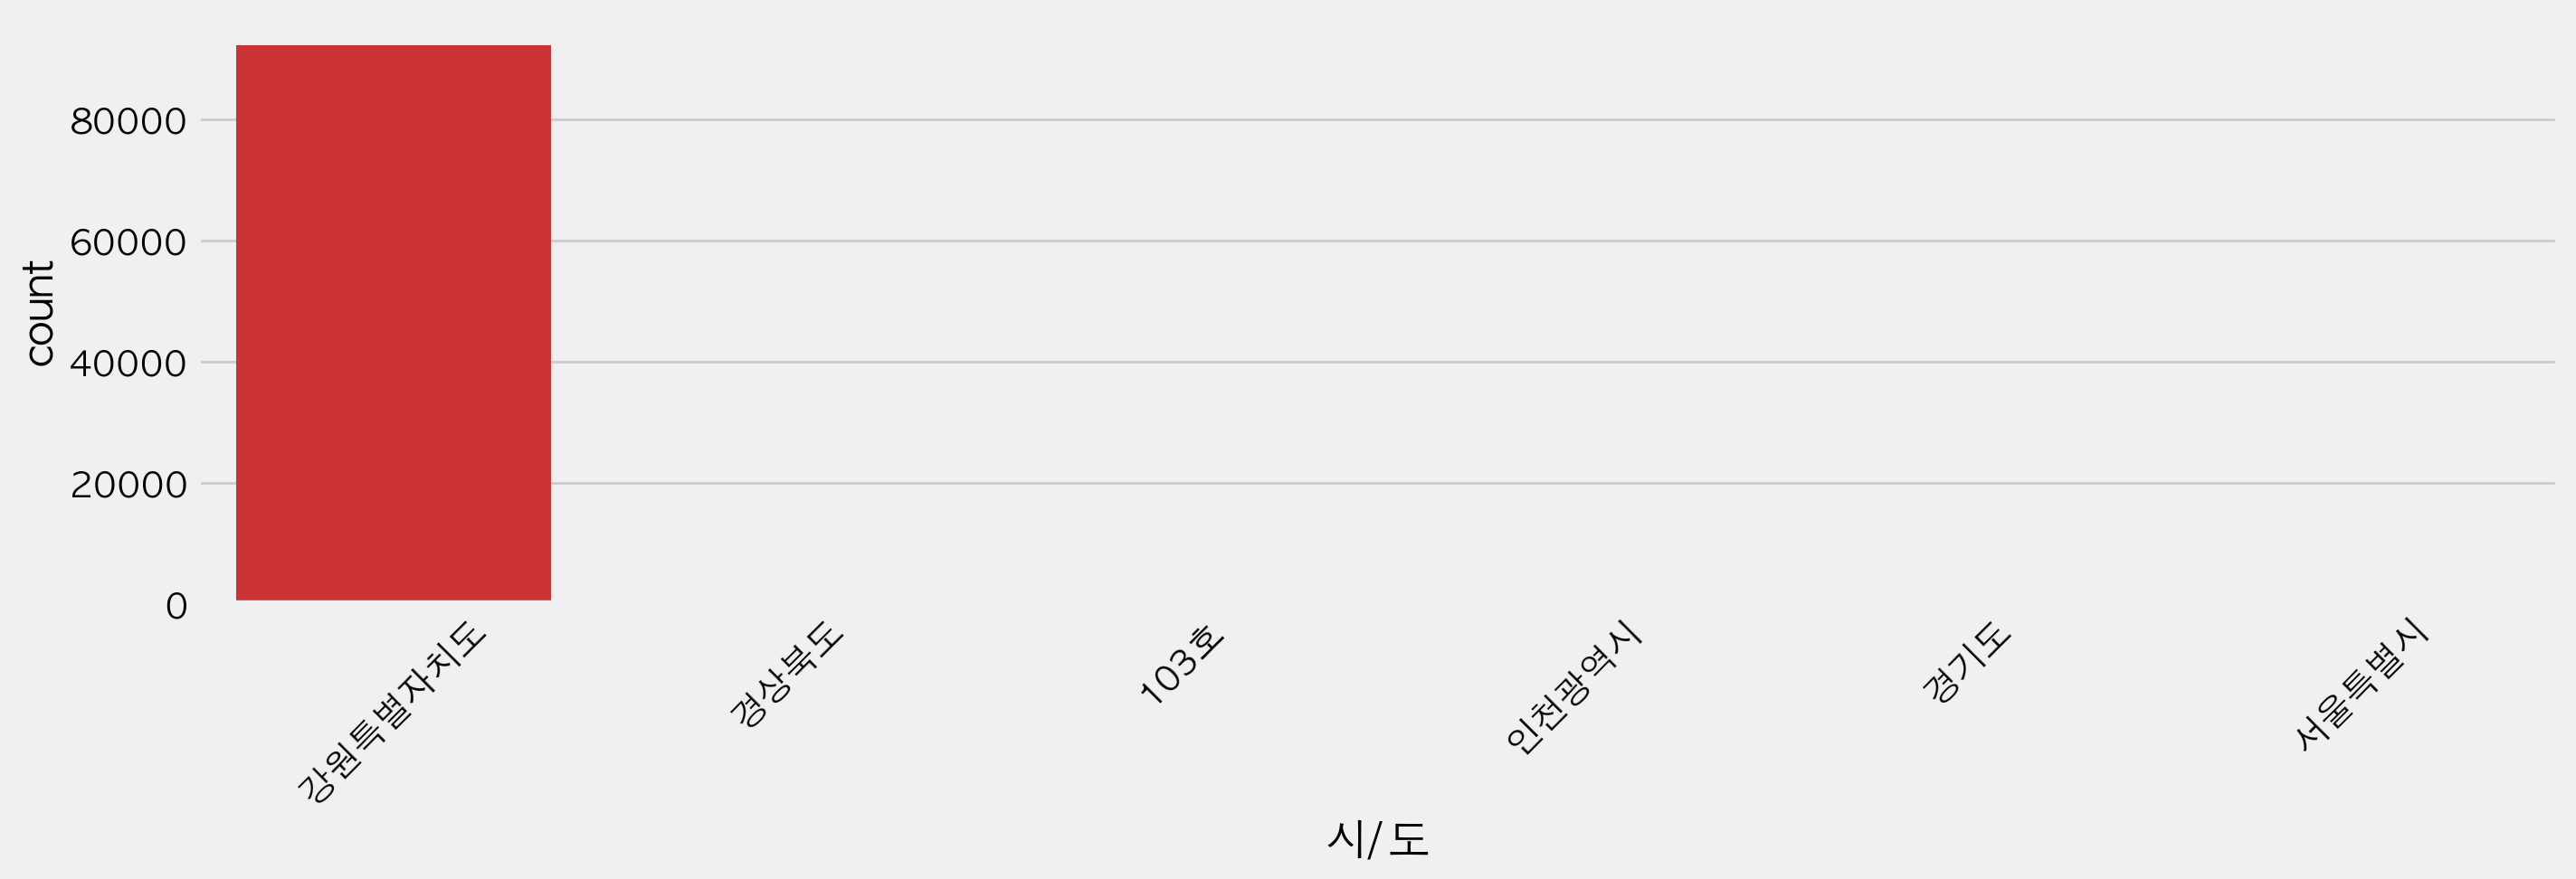

/var/folders/vm/5qmxs2qx4jqfzfp5dmt_3x900000gn/T/ipykernel_27010/2891999590.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='구군', palette='Set2')


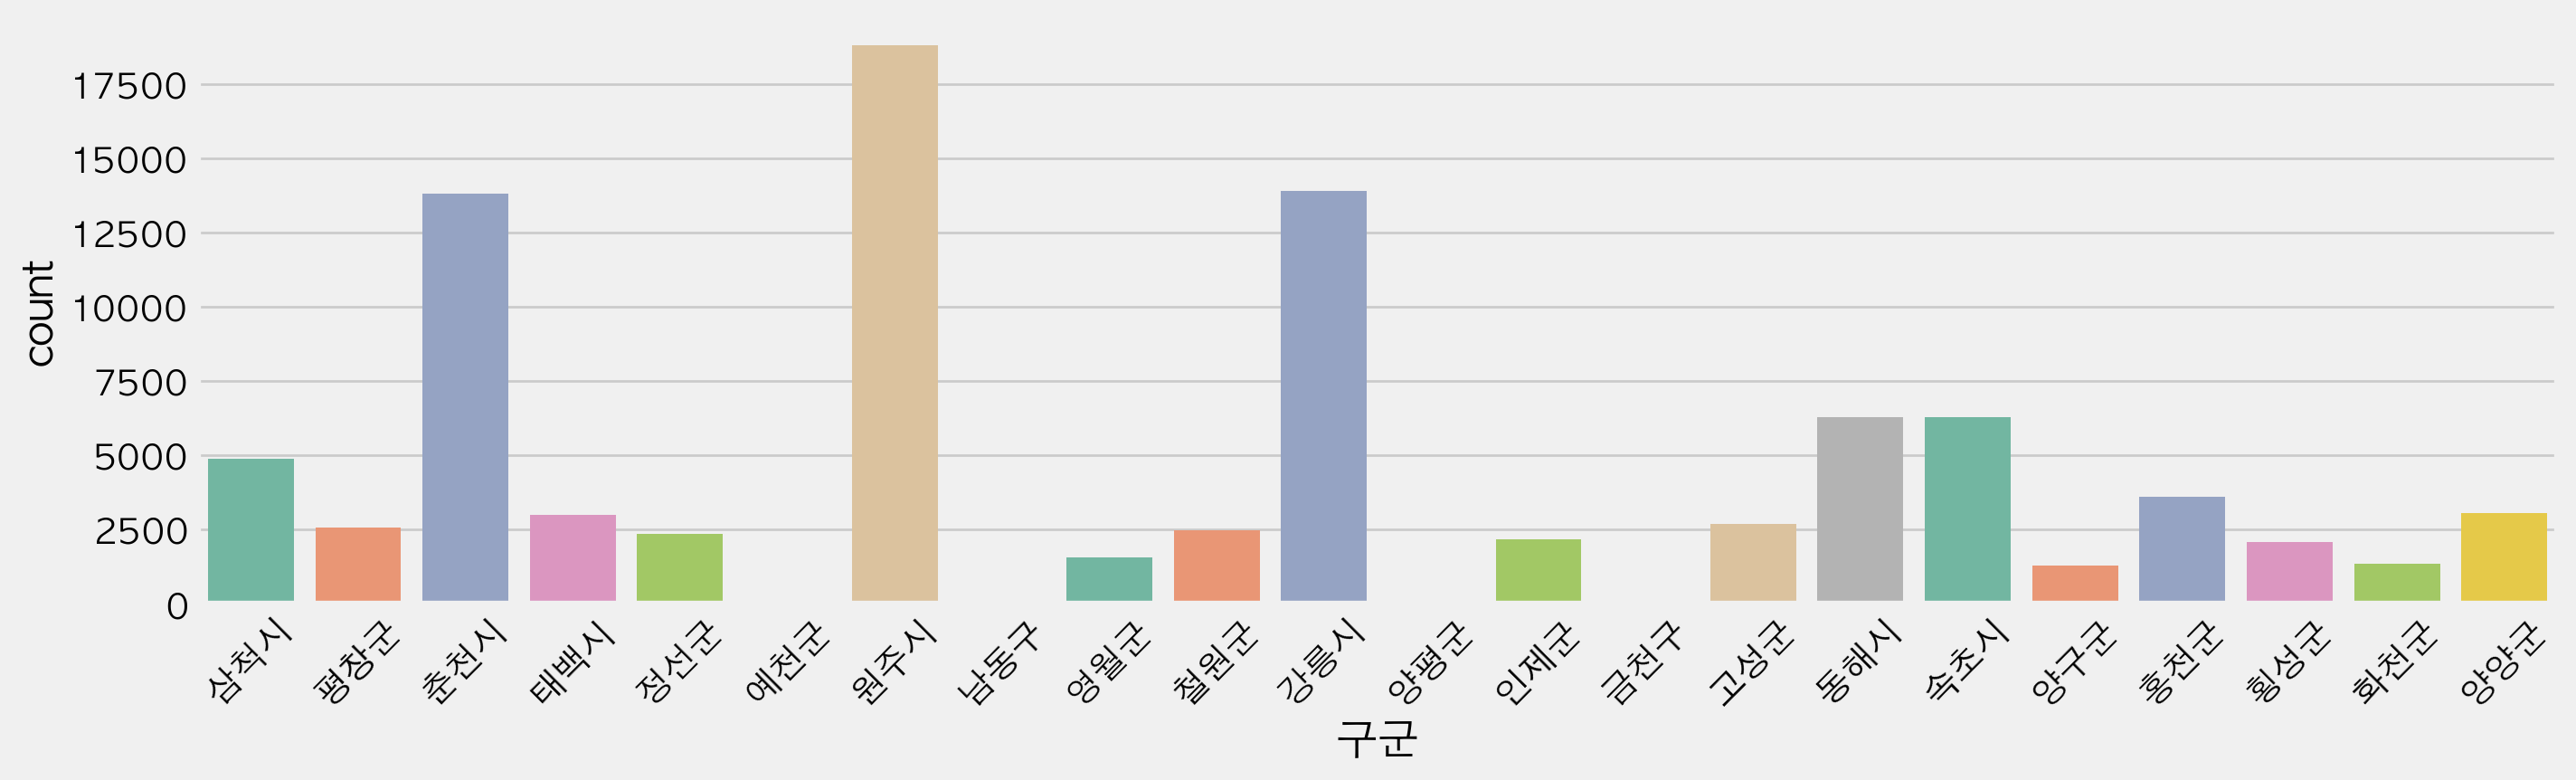

In [54]:
# 구군 별로 데이터를 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정(애플고딕)
plt.rc('font', family='AppleGothic')

# 그래프에 마이너스 표시가 되도록 설정
plt.rc('axes', unicode_minus=False)

# 그래프 스타일 설정
plt.style.use('fivethirtyeight')

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프에 한글 표시
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list[:]
plt.rcParams['font.family'] = 'AppleGothic'

# 구군 별로 데이터를 시각화
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='시/도', palette='Set1')
plt.xticks(rotation=45)
plt.show()

# 구군 별로 데이터를 시각화
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='구군', palette='Set2')
plt.xticks(rotation=45)
plt.show()

In [55]:
# 시/도 중 강원도만 선택
df = df[df['시/도'] == '강원특별자치도']
df = df.reset_index(drop=True)
print('\n=====강원도 데이터 확인=====')
df


=====강원도 데이터 확인=====


In [57]:
# 시/도 중 강원도만 선택
df = df[df['구군'] == '춘천시']
df = df.reset_index(drop=True)
print('\n=====강원도 춘천시 데이터 확인=====')
df


=====강원도 춘천시 데이터 확인=====


,번호,인허가일자,영업상태구분코드,소재지전체주소,사업장명,업태구분명,시설총규모,최종수정시점,시/도,구군,동/면
0,7498,2023-08-30,1,강원특별자치도 춘천시 소양로4가 109-5,밥묵자고기묵자,기타,21.60,2023-08-31 15:04:45,강원특별자치도,춘천시,[소양로4가]
1,7499,2023-08-03,1,강원특별자치도 춘천시 후평동 684-14,훈연고기,기타,28.20,2023-08-21 16:01:37,강원특별자치도,춘천시,[후평동]
2,7500,2023-08-16,1,강원특별자치도 춘천시 운교동 185-5,페페버거,기타,22.00,2023-08-28 17:10:53,강원특별자치도,춘천시,[운교동]
3,7501,2023-08-16,1,강원특별자치도 춘천시 동내면 거두리 912-1,명륜진사갈비거두사거리점,기타,367.98,2023-09-05 09:17:03,강원특별자치도,춘천시,"[동내면, 거두리]"
4,7502,2023-08-16,1,강원특별자치도 춘천시 석사동 654-19,백돈춘천점,기타,86.13,2023-08-16 14:35:53,강원특별자치도,춘천시,[석사동]
...,...,...,...,...,...,...,...,...,...,...,...
13796,21295,2018-02-27,3,강원특별자치도 춘천시 동면 지내리 2-22,일품헌,중국식,116.64,2019-08-16 17:01:33,강원특별자치도,춘천시,"[동면, 지내리]"
13797,21296,2020-06-12,3,강원특별자치도 춘천시 효자동 754-9,우리집손만두,한식,69.78,2022-08-09 09:23:41,강원특별자치도,춘천시,[효자동]
13798,21297,2020-06-22,3,강원특별자치도 춘천시 석사동 917-7,진주강씨,식육(숯불구이),87.04,2022-03-17 13:02:41,강원특별자치도,춘천시,[석사동]
13799,21298,2020-06-22,3,강원특별자치도 춘천시 요선동 9-3,오늘은커피,기타,56.40,2022-06-14 13:39:26,강원특별자치도,춘천시,[요선동]


In [58]:
# df를 csv 파일로 저장
df.to_csv('../data/c4_general_cafeteria_select_CC.csv', index=False)